In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
bikesTrain = pd.read_csv("./bikes/train.csv")
bikesTrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
bikesTest = pd.read_csv("./bikes/test.csv")
bikesTest.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
sample = pd.read_csv("./bikes/sampleSubmission.csv")
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [31]:
trip = pd.read_csv("./sf/trip.csv")
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [ ]:
#duration - dat je u sekundatama
#vidimo po min i max da je najkraca voznja bila 60 sekundi a najduza 200 dana
#ogranicavamo se na voznju izmedju 5 i 60 minuta

In [15]:
trip.min(axis=0)

id                             4069
duration                         60
start_date            1/1/2014 0:14
start_station_name    2nd at Folsom
start_station_id                  2
end_date              1/1/2014 0:21
end_station_name      2nd at Folsom
end_station_id                    2
bike_id                           9
subscription_type          Customer
zip_code                        inf
dtype: object

In [16]:
trip.max(axis=0)

id                                                           913460
duration                                                   17270400
start_date                                            9/9/2014 9:59
start_station_name    Yerba Buena Center of the Arts (3rd @ Howard)
start_station_id                                                 84
end_date                                              9/9/2014 9:59
end_station_name      Yerba Buena Center of the Arts (3rd @ Howard)
end_station_id                                                   84
bike_id                                                         878
subscription_type                                        Subscriber
zip_code                                                      v6z2x
dtype: object

In [32]:
tripSort = trip.sort_values(by=['id'], ascending=True)

In [23]:
tripSort.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
32,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597


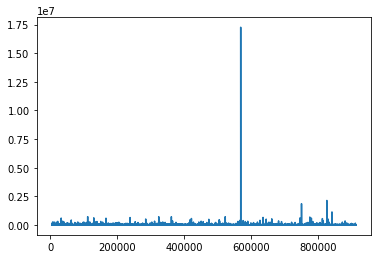

In [28]:
plt.plot(tripSort['id'], tripSort['duration'])

In [33]:
tripSort.shape

(669959, 11)

In [34]:
tripNoOutliers = tripSort[tripSort.duration < 3600]

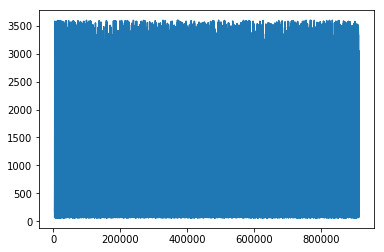

In [36]:
plt.plot(tripNoOutliers['id'], tripNoOutliers['duration'])

In [38]:
tripNoOutliers = tripNoOutliers[tripNoOutliers.duration > 300]

In [39]:
tripNoOutliers.shape

(523202, 11)

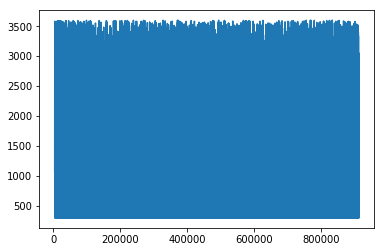

In [40]:
plt.plot(tripNoOutliers['id'], tripNoOutliers['duration'])

In [41]:
#sada su izbaceni svi outlieri, sto se duration atributa tice
#Finalni dataframe - tripNoOutliers

In [ ]:
#pravimo kolonu koja oznacava dan u nedelji
#a zatim dodeljeujemo 1 ako je radni dan i 0 ako je neradni dan

In [43]:
tripNoOutliers['day_of_week'] = pd.to_datetime(tripNoOutliers['start_date']).dt.weekday_name
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,Thursday
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,Thursday
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,Thursday
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,Thursday
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,Thursday


In [48]:
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Saturday', 'day_of_week'] = 0
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Sunday', 'day_of_week'] = 0
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Monday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Tuesday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Wednesday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Thursday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Friday', 'day_of_week'] = 1

In [51]:
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,1
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,1
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,1
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,1
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,1


In [ ]:
#izbacujemo nedostajuce vrednosti

In [52]:
tripNoOutliers.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              4910
day_of_week              0
dtype: int64

In [54]:
tripNoOutliers = tripNoOutliers.dropna(subset = ['zip_code'])

In [55]:
tripNoOutliers.isnull().sum()

id                    0
duration              0
start_date            0
start_station_name    0
start_station_id      0
end_date              0
end_station_name      0
end_station_id        0
bike_id               0
subscription_type     0
zip_code              0
day_of_week           0
dtype: int64

In [77]:
tripNoOutliers['time_of_day'] = pd.to_datetime(tripNoOutliers['start_date']).dt.hour

/home/ana/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,time_of_day
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,1,9
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,1,9
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,1,9
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,1,9
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,1,9


In [84]:
#mozda bi bilo bolje malo ispraviti ovo?
#ali ideja je da sate kad je voznja pocela grupisemo u kategorije

In [82]:
tripNoOutliers['time_of_day'] = pd.cut(tripNoOutliers['time_of_day'], [0, 6, 12, 18, 24], labels=['early_morning', 'rush_hour', 'noon', 'night'])


/home/ana/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,time_of_day
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,1,rush_hour
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,1,rush_hour
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,1,rush_hour
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,1,rush_hour
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,1,rush_hour


In [11]:
station = pd.read_csv("./sf/station.csv")
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [12]:
status = pd.read_csv("./sf/status.csv")
status.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [13]:
weather = pd.read_csv("./sf/weather.csv")
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
